# Day 30

In [2]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# 결정론적 추세 추정

## 추세

확률 과정의 기대값이 시간 $t$에 대한 함수로 표현될 수 있으면 이를 **추세(trend)**라고 한다.

$$ \mu_t = \text{E}[Y_t] = f(t) $$

보통은 추세 함수 $f(t)$가 상수가 아니라 $t$에 따라 변화하는 경우, **추세를 가진다**고 말한다. 
이 추세는 확률 변수가 아닌 함수로 표현할 수 있기 때문에 **결정론적 추세(deterministic trend)**라고도 한다.

다음 시계열들은 모두 추세를 가지는 확률 과정의 샘플이다.

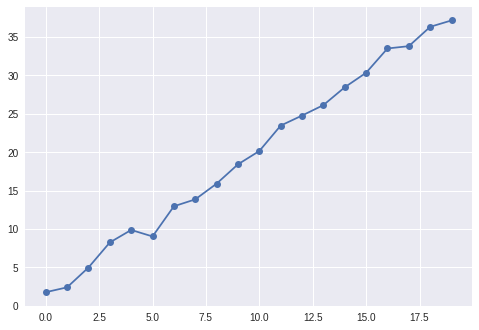

In [3]:
np.random.seed(0)
t = np.arange(20)
x = 2 * t + sp.stats.norm.rvs(size=20)
plt.plot(t, x, 'o-')
plt.show()

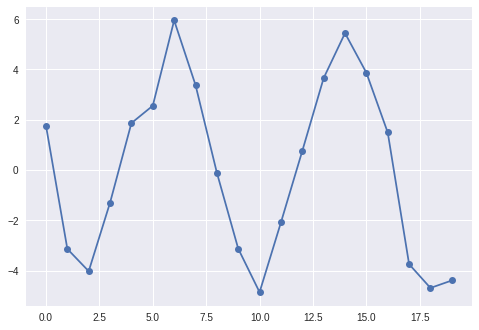

In [4]:
np.random.seed(0)
t = np.arange(20)
x = -5*np.sin(0.25*np.pi*t) + sp.stats.norm.rvs(size=20)
plt.plot(t, x, 'o-')
plt.show()

다시 말하지만 확률 과정의 기댓값은 앙상블(Ensemble) 개념이므로 앞으로 이야기할 정상 가정과 에르고딕 가정이 없다면  **하나의 샘플에서 추세가 있다고 판단하거나 추세를 추정하는 것은 원리적으로 불가능하다**. 이러한 가정 없이 추세를 추정하기 위해서는 다음과 같이 복수개의 시계열 자료 샘플이 있어야 한다.

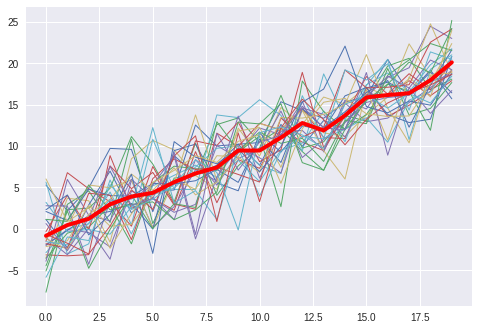

In [5]:
np.random.seed(0)
t = np.arange(20)
y = np.zeros((30, 20))
for i in range(30):
    y[i,:] = t + 3 * sp.stats.norm.rvs(size=20)
    plt.plot(t, y[i], lw=1);
plt.plot(t, np.mean(y, axis=0), 'r-', lw=4)
plt.show()

## 결정론적 추세 추정

확률 과정의 기댓값이 시간에 대한 함수로 표현될 수 있을 때 추세(trend)를 가진다고 한다. (결정론적) **추세 추정(trend estimation)**은 것은 이 기댓값 함수의 형태를 알아내는 것을 말한다. 

추세에 대한 소개는 다음 노트북을 참조한다.

추세를 가진다는 것은 결국 확률 과정이 정상 과정(stationary process)이 아니라 비정상 과정(non-stationary process)임을 뜻한다. 그러나 분석을 쉽게 하기 위해 보통 다음과 같은 가정을 한다.

* 우리가 분석하고자하는 확률 과정 $Y_t$이 일반적인 비정상 과정이 아니라 추정이 가능한 **결정론적 추세 함수 $f(t)$와 확률 정상 과정 $X_t$의 합**으로 표현될 수 있다. 

$$ Y_t \sim f(t) + X_t $$


계절성도 추세에 포함 된다고 볼 수 있다.

* 다항식 추세 (polynomial trend)
* 계절성 추세 (seasonality)

## 다항식 추세

다항식 추세 분석 방법은 추세 함수 즉, 확률 과정의 기댓값을 시간에 대한 다항식으로 나타낼 수 있다고 가정하는 것이다.

$$ f(t) = \sum_{i=0}^M a_i t^i = a_0 + a_1 t + a_2 t^2 + \cdots $$

In [8]:
import statsmodels as sm
data = sm.datasets.get_rdataset("deaths", "MASS")

In [14]:
print(data.__doc__)

+--------------------------------------+--------------------------------------+
| deaths                               |
| R Documentation                      |
+--------------------------------------+--------------------------------------+

Monthly Deaths from Lung Diseases in the UK
-------------------------------------------

Description
~~~~~~~~~~~

A time series giving the monthly deaths from bronchitis, emphysema and
asthma in the UK, 1974-1979, both sexes (``deaths``),

Usage
~~~~~

::

    deaths

Source
~~~~~~

P. J. Diggle (1990) *Time Series: A Biostatistical Introduction.*
Oxford, table A.3

References
~~~~~~~~~~

Venables, W. N. and Ripley, B. D. (2002) *Modern Applied Statistics with
S.* Fourth edition. Springer.

See Also
~~~~~~~~

This the same as dataset ``ldeaths`` in **R**'s datasets package.



In [15]:
df = data.data
df.tail()

,time,deaths
67,1979.583333,1354
68,1979.666667,1333
69,1979.750000,1492
70,1979.833333,1781
71,1979.916667,1915


In [16]:
def yearfraction2datetime(yearfraction, startyear=0):
    import datetime, dateutil
    year = int(yearfraction) + startyear
    month = int(round(12 * (yearfraction - year)))
    delta = dateutil.relativedelta.relativedelta(months=month)
    date = datetime.datetime(year, 1, 1) + delta
    return date

In [20]:
df["datetime"] = df.time.map(yearfraction2datetime)
df.tail()

,time,deaths,datetime
67,1979.583333,1354,1979-08-01
68,1979.666667,1333,1979-09-01
69,1979.750000,1492,1979-10-01
70,1979.833333,1781,1979-11-01
71,1979.916667,1915,1979-12-01


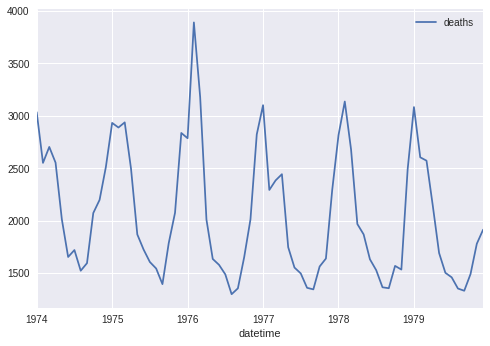

In [19]:
df.plot(x="datetime", y="deaths")
plt.show()

In [31]:
from statsmodels.regression.linear_model import OLS

In [32]:
df["month"] = df.datetime.dt.month
df.tail()

,time,deaths,datetime,month
67,1979.583333,1354,1979-08-01,8
68,1979.666667,1333,1979-09-01,9
69,1979.750000,1492,1979-10-01,10
70,1979.833333,1781,1979-11-01,11
71,1979.916667,1915,1979-12-01,12


In [36]:
result = OLS.from_formula('deaths ~ C(month) -1', data=df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 deaths   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     31.66
Date:                Thu, 06 Jul 2017   Prob (F-statistic):           6.55e-21
Time:                        13:53:48   Log-Likelihood:                -494.38
No. Observations:                  72   AIC:                             1013.
Df Residuals:                      60   BIC:                             1040.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
C(month)[1]   2959.3333    103.831     28.502   

In [55]:
predicted = result.predict(df)
df_pred = pd.Series(predicted, name="predicted")
df = pd.concat([df, df_pred], axis=1)

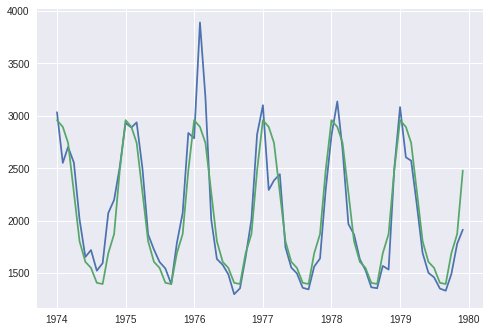

In [59]:
plt.plot(df["datetime"], df["deaths"])
plt.plot(df["datetime"], df["predicted")
plt.show()

---

In [60]:
df = sm.datasets.get_rdataset("AirPassengers").data

def yearfraction2datetime(yearfraction, startyear=0):
    import datetime, dateutil
    year = int(yearfraction) + startyear
    month = int(round(12 * (yearfraction - year)))
    delta = dateutil.relativedelta.relativedelta(months=month)
    date = datetime.datetime(year, 1, 1) + delta
    return date

df["datetime"] = df.time.map(yearfraction2datetime)

df.tail()

,time,AirPassengers,datetime
139,1960.583333,606,1960-08-01
140,1960.666667,508,1960-09-01
141,1960.750000,461,1960-10-01
142,1960.833333,390,1960-11-01
143,1960.916667,432,1960-12-01


In [66]:
result = OLS.from_formula("AirPassengers ~ time", data=df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          AirPassengers   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     828.2
Date:                Thu, 06 Jul 2017   Prob (F-statistic):           4.02e-61
Time:                        14:17:27   Log-Likelihood:                -754.82
No. Observations:                 144   AIC:                             1514.
Df Residuals:                     142   BIC:                             1520.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6.206e+04   2166.077    -28.649      0.0

In [112]:
df["log_passg"] = np.log(df.AirPassengers)
df["month"] = df.datetime.dt.month

In [126]:
result = OLS.from_formula("log_passg ~ time + C(month) + 0", data=df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_passg   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     649.4
Date:                Thu, 06 Jul 2017   Prob (F-statistic):          2.31e-110
Time:                        14:37:10   Log-Likelihood:                 209.30
No. Observations:                 144   AIC:                            -392.6
Df Residuals:                     131   BIC:                            -354.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
C(month)[1]   -230.7524      2.798    -82.467      0.000    -236.288    -225.217
C(month)[2]   -230.7744      2.798    -82.471      0.000    -236.310    -225.239
C(month)[3]   -230.6442      2.798    -82.421      0.000    -236.180    -225.108
C(month)[4]   -230.6755      2.798    -82.429      0.000    -236.212    -225.139
C(month)[5]   -230.6778      2.799    -82.426      0.000    -236.214    -225.142
C(month)[6]   -230.5557      2.799    -82.379      0.000    -236.092    -225.019
C(month)[7]   -230.4517      2.799    -82.339      0.000    -235.988    -224.915
C(month)[8]   -230.4610      2.799    -82.338      0.000    -235.998    -224.924
C(month)[9]   -230.6057      2.799    -82.386      0.000    -236.143    -225.068
C(month)[10]  -230.7438      2.799    -82.432      0.000    -236.281    -225.206
C(month)[11]  -230.8875      2.799    -82.480      0.000    -236.425    -225.350
C(month)[12]  -230.7737      2.799    -82.436      0.000    -236.312    -225.236
time             0.1208      0.001     84.399      0.000       0.118       0.124
==============================================================================
Omnibus:                        2.692   Durbin-Watson:                   0.425
Prob(Omnibus):                  0.260   Jarque-Bera (JB):                2.412
Skew:                          -0.224   Prob(JB):                        0.299
Kurtosis:                       2.551   Cond. No.                     3.84e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.84e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

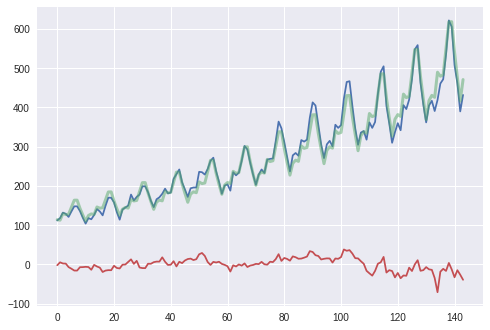

In [129]:
plt.plot(df.AirPassengers)
plt.plot(np.exp(result.fittedvalues), lw=3, alpha=0.5)
plt.plot(df.AirPassengers - np.exp(result.fittedvalues))
plt.show()

# 샘플 자기상관계수 함수

## 샘플 자기상관계수 함수의 정의

자기상관계수 함수(ACF: autocorrelation function) $\rho_k$는 정상 확률 과정을 표현할 수 있는 가장 대표적인 특성이다. 그러나 자기상관계수 함수 $\rho(k)$의 정확한 값을 알기 위해서는 해당 정상 확률 과정에 대한 수학적인 모형을 알고 있어야 한다. 만약 수학적 모형이 없고 시계열 자료 즉, 확률 과정의 샘플만 존재하는 경우에는 이로부터 **샘플 자기상관계수 함수(Sample ACF)**를 구하여 이론적인 자기상관계수 함수의 형태를 유추해야 한다.

시계열 자료 $\{y_t; t=1, \cdots, n\}$가 존재하는 경우 샘플 자기상관계수 함수 $r_k$는 샘플 자기공분산 함수 $\hat{\gamma}_k$의 비(ratio)로 정의한다.


$$ \hat{\gamma}_k  = \dfrac{1}{n} \sum_{t=k+1}^n (y_t - \bar{y})(y_{t-k} - \bar{y}) $$


$$ \hat{r}_k = \dfrac{\hat{\gamma}_k}{\hat{\gamma}_0} = \dfrac{\sum_{t=k+1}^n (y_t - \bar{y})(y_{t-k} - \bar{y})}{\sum_{t=1}^n (y_t - \bar{y})^2} $$

일반적으로는 샘플 자기공분산 함수의 정의에서 분모를 $n-k$가 아닌 $n$를 사용한다. 이렇게 편향 오차가 있는 추정값을 사용하는 것은 자기공분산 행렬을 양한정(positive definite)으로 만들기 위한 것이다

## Python 에서 샘플 자기상관계수 함수 계산

statsmodels에서 샘플 자기공분산 함수 혹은 샘플 자기상관계수 함수를 구하려면 [`acovf`](http://statsmodels.sourceforge.net/stable/generated/statsmodels.tsa.stattools.acovf.html#statsmodels.tsa.stattools.acovf) 혹은 [`acf`](http://statsmodels.sourceforge.net/stable/generated/statsmodels.tsa.stattools.acf.html#statsmodels.tsa.stattools.acf) 함수를 사용한다.

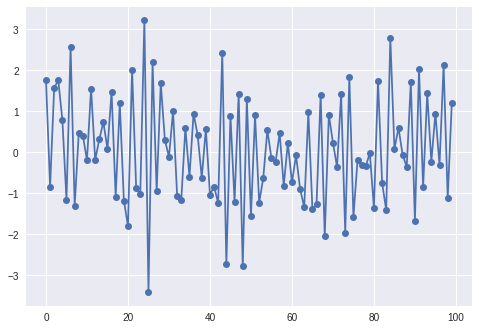

In [132]:
from statsmodels.tsa.arima_process import ArmaProcess
np.random.seed(0)
p = ArmaProcess([1], [1, -0.7, 0.5])
y = p.generate_sample(100)
plt.plot(y, 'o-')
plt.show()

In [149]:
from statsmodels.tsa.stattools import acf

In [150]:
acf = acf(y)
acf

array([ 1.        , -0.58739105,  0.35031803,  0.00498482, -0.01397113,
        0.07163358, -0.01802841,  0.01584547,  0.17669837, -0.22766943,
        0.28222138, -0.17787336,  0.1306332 ,  0.09547339, -0.14429412,
        0.2576279 , -0.16731472,  0.05391657,  0.01602894, -0.02425665,
       -0.02014025,  0.05931565, -0.04295451,  0.04077237, -0.10082598,
        0.17204025, -0.15233124,  0.09468713,  0.00224732, -0.04900103,
        0.0014167 ,  0.00761237, -0.10039879,  0.08961654, -0.11113657,
        0.04220667, -0.03688234, -0.06425659,  0.01498291, -0.07551366,
       -0.01346472])

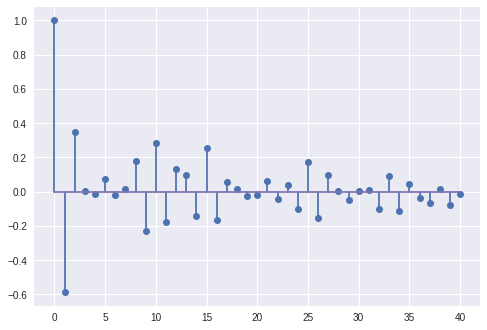

In [138]:
plt.stem(acf)
plt.show()

## 샘플 자기상관계수 함수의 분포 특성

샘플 자기상관계수 함수의 값은 계산에 사용된 시계열 값 즉, 샘플에 의존하기 때문에 마찬가지로 확률 변수가 된다. 샘플 자기상관계수 함수의 분포 특성은 다음과 같다.

* 샘플 시계열의 길이 $n$이 크면,

  * 샘플 자기상관계수의 분포는 정규분포와 비슷해진다.
  
  * 샘플 자기상관계수 $r_k$의 기댓값은 이론적인 자기상관계수 $\rho_k$이다
  
  * 샘플 자기상관계수 $r_k$의 분산은 $n$에 반비례 한다. 
  
  $$ \text{Var}[r_k] \sim \dfrac{1}{n} $$
  

만약 확률 과정이 가우시안 백색 잡음인 경우에는 샘플 자기상관계수는 기댓값 $\rho_k$와 분산 $1/n$을 가지는 정규분포가 된다.

$$ \text{Var}[r_k] \sim \mathcal{N}\left(\rho_k, \dfrac{1}{n}\right) $$

statsmodels의 acf 함수는 alpha 인수가 주어지는 경우, 이 값을 유의 수준(significance level)로 가지는 자기상관계수의 신뢰구간을 출력한다. 

In [152]:
from statsmodels.tsa.stattools import acf
acf, confint = acf(y, alpha=0.05)
confint

array([[ 1.        ,  1.        ],
       [-0.78338745, -0.39139465],
       [ 0.09551846,  0.60511761],
       [-0.26768992,  0.27765955],
       [-0.28664936,  0.25870711],
       [-0.20107215,  0.34433932],
       [-0.29145602,  0.25539919],
       [-0.25762779,  0.28931874],
       [-0.09681016,  0.4502069 ],
       [-0.50552857,  0.0501897 ],
       [-0.00271373,  0.56715649],
       [-0.47335158,  0.11760485],
       [-0.1689301 ,  0.4301965 ],
       [-0.20627031,  0.3972171 ],
       [-0.44719604,  0.1586078 ],
       [-0.04790314,  0.56315894],
       [-0.48107981,  0.14645037],
       [-0.26325736,  0.37109051],
       [-0.30149688,  0.33355477],
       [-0.34181356,  0.29330025],
       [-0.33776833,  0.29748782],
       [-0.25836148,  0.37699278],
       [-0.3610568 ,  0.27514778],
       [-0.27755266,  0.3590974 ],
       [-0.41935156,  0.21769961],
       [-0.147709  ,  0.49178949],
       [-0.47561681,  0.17095433],
       [-0.23134411,  0.42071836],
       [-0.32483859,

/home/jihoon_kim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  
/home/jihoon_kim/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/jihoon_kim/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


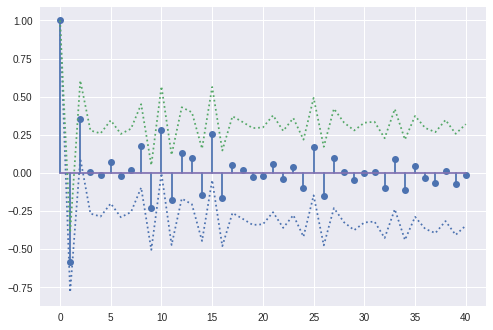

In [153]:
plt.stem(acf)
plt.hold(True)
plt.plot(confint[:, 0], ":")
plt.plot(confint[:, 1], ":")
plt.show()

/home/jihoon_kim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  
/home/jihoon_kim/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/jihoon_kim/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


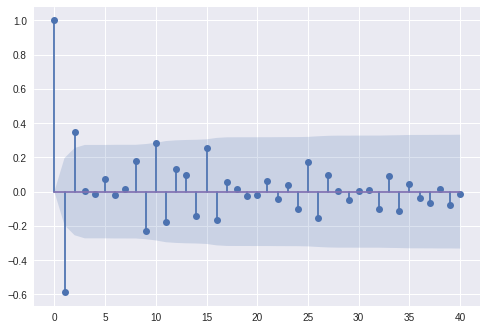

In [154]:
plt.stem(acf)
plt.hold(True)
c = 0.5 * (confint[:, 1] - confint[:, 0])
plt.fill_between(np.arange(len(acf)), -c, c, alpha=0.2)
plt.show()

`statsmodels.graphics.tsa.plot_acf` 명령은 샘플 자기상관계수 함수와 표준 오차의 크기를 동시에 그려준다.

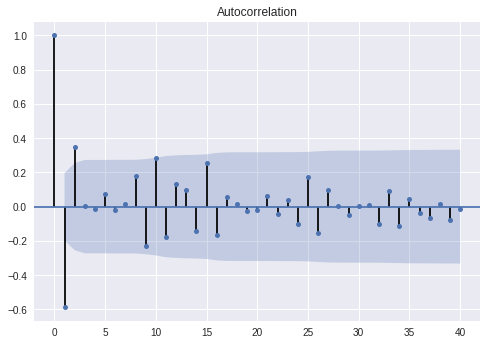

In [156]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(y, lags=40)
plt.show()

# 편자기상관계수 함수

## 편자기상관계수 함수의 정의

**편자기상관계수 함수(PACF: partial autocorrelation function)**는 AR 모형의 차수(order)를 추정하기 위한 방법의 하나이다.

일반적인 자기상관계수 함수 $\rho_k$는 확률 과정의 시각 $t$의 값 $Y_t$와 시각 $t-k$의 값 $Y_{t-k}$의 상관계수를 뜻한다. 편자기상관계수 함수는 이와 달리 두 시각 사이의 값 즉 $Y_{t-1}, \cdots, Y_{t-k+1}$의 영향을 배제한다. 

이 사이 값들의 영향을 없애기 위해 우선 $Y_t$ 값(종속 변수)과  $Y_{t-1}, \cdots, Y_{t-k+1}$라는 $k-1$개의 값들(독립 변수) 사이의 선형 회귀 분석을 실시한다. 

$$ \hat{Y}_t = \beta_1 Y_{t-1}  + \beta_2 Y_{t-2}  + \beta_3 Y_{t-3}  + \cdots + \beta_{k-1} Y_{t-k+1}  $$

이 식에서 $\beta$는 선형 회귀 분석의 결과로 얻어진 계수이다. 

$k=2$인 경우만 따지면 계수 $\beta_1 = \rho_1$이 된다. 즉,

$$ \hat{Y}_t = \rho_1 Y_{t-1} $$

이와 반대 (시간) 방향으로 $Y_{t-k}$ 값(종속 변수)과  $Y_{t-1}, \cdots, Y_{t-k+1}$라는 $k-1$개의 값들(독립 변수) 사이의 선형 회귀 분석을 실시하면 정상 확률 과정의 경우에 결과는 다음과 같다.

$$ \hat{Y}_{t-k} = \beta_1 Y_{t-k+1}  + \beta_2 Y_{t-k+2}  + \beta_3 Y_{t-k+3}  + \cdots + \beta_{k-1} Y_{t-1}  $$

위 회귀 분석의 계수가 동일하게 나오는 이유는 정상 확률 과정의 특성때문이다.

첫번째 항을 예로 들면 살펴보면, 

$$ \text{corr}[Y_t, Y_{t-1}] = \text{corr}[Y_t, Y_{t+1}] = \text{corr}[Y_{t-k}, Y_{t-k+1}] $$

로 $Y_t \leftrightarrow Y_{t-1}$의 관계가 $Y_{t-k} \leftrightarrow Y_{t-k+1}$의 관계와 동일하다.

**편자기상관계수 함수 $\phi_k$**는 위와 같은 선형 회귀 분석으로 얻은 추정치 $\hat{Y}_t$, $\hat{Y}_{t-k}$를 원래의 값 ${Y}_t$, ${Y}_{t-k}$ 에서 뺀 나머지 값 사이의 자기상관계수 함수로 정의한다. 즉,

$$  \phi_{kk} = \text{corr}[(Y_{t} - \hat{Y}_t),(Y_{t-k}-\hat{Y}_{t-k})] \; \text{ for } k > 1 $$

이다. $k=1$인 경우는 1로 정의한다.
$$  \phi_{11} = 1 $$

## AR 모형의 편자기상관계수 함수

다음과 같은 AR(p) 모형에 대해 

$$  Y_t = \phi_1 Y_{t-1} + \cdots + \phi_p Y_{t-p} + e_t $$

$Y_t$ 값(종속 변수)과  $Y_{t-1}, \cdots, Y_{t-k+1}$라는 $k-1$개의 값들(독립 변수) 사이의 선형 회귀 분석을 하면 다음과 같은 결과를 얻는다.

$k=1$인 경우에는,

$$ \hat{Y}_t = \phi_1 Y_{t-1} $$

$k=2$인 경우에는,

$$ \hat{Y}_t = \phi_1 Y_{t-1} + \phi_2 Y_{t-2} $$

$k < p $인 경우에는,

$$ \hat{Y}_t = \phi_1 Y_{t-1} + \phi_2 Y_{t-2} + \cdots + \phi_k Y_{t-k} $$


$k \geq p $인 경우에는,

$$ \hat{Y}_t = \phi_1 Y_{t-1} + \phi_2 Y_{t-2} + \cdots + \phi_p Y_{t-p} + 0 \cdot Y_{t-p-1} + \cdots + 0 \cdot Y_{t-k}$$

이며 이 경우에는 회귀 분석의 잔차항(residual)이 원래의 확률 과정과 아무런 상관관계가 없는 백색 잡음이 된다.

AR(p) 모형은 정상 과정이므로 시간을 반대 방향으로 해도 같은 결과를 얻을 수 있다. 즉, 

$Y_t$ 값(종속 변수)과  $Y_{t+1}, \cdots, Y_{t+k-1}$라는 $k-1$개의 값들(독립 변수) 사이의 선형 회귀 분석을 하면 다음과 같은 결과를 얻는다.

$k=1$인 경우에는,

$$ \hat{Y}_t = \phi_1 Y_{t+1} $$

$k=2$인 경우에는,

$$ \hat{Y}_t = \phi_1 Y_{t+1} + \phi_2 Y_{t+2} $$

$k \leq p $인 경우에는,

$$ \hat{Y}_t = \phi_1 Y_{t+1} + \phi_2 Y_{t+2} + \cdots + \phi_k Y_{t+k} $$


$k > p $인 경우에는,

$$ \hat{Y}_t = \phi_1 Y_{t+1} + \phi_2 Y_{t+2} + \cdots + \phi_p Y_{t+p} + 0 \cdot Y_{t+p+1} + \cdots + 0 \cdot Y_{t+k}$$

이다.

회귀 분석 결과를 알았으니 이제 편자기상관계수를 구해보자.

우선 AR(1) 모형을 고려해 보자.

$$  Y_t = \phi_1 Y_{t-1} + e_t $$

$k=1$인 경우, 정의에 의해 

$$ \phi_{11} = 1 $$

$k=2$인 경우,

$$ 
\begin{eqnarray}
\phi_{22} 
&=& \text{corr}[(Y_{t} - \hat{Y}_t),(Y_{t-2}-\hat{Y}_{t-2})]  \\
&=& \text{corr}[(Y_{t} -  \phi_1 Y_{t-1}),(Y_{t-2}-\phi_1 Y_{t-1})]  \\
&\propto& \text{Cov}[(Y_{t} -  \phi_1 Y_{t-1}),(Y_{t-2}-\phi_1 Y_{t-1})]  \\
&=& \text{E}[(Y_{t} -  \phi_1 Y_{t-1})(Y_{t-2}-\phi_1 Y_{t-1})]  \\
&=& \gamma_0(\rho_2 - \phi_1 \rho_1 - \phi_1 \rho_1 + \phi_1^2 \rho_0 )\\
\end{eqnarray}
$$

AR(1) 모형의 경우 이론적인 자기상관계수 함수 $\rho_k$는 다음과 같이 계산된다.

$$ \rho_k = \phi_1^k $$

따라서

$$ \rho_2 - \phi_1 \rho_1 - \phi_1 \rho_1 + \phi_1^2 \rho_0 = \phi_1^2 - \phi_1 \cdot \phi_1 - \phi_1 \cdot \phi_1 + \phi_1^2 \cdot 1 = 0 $$
즉,  $\phi_{22} = 0$이다.

$k=3$인 경우도 마찬가지로 $\phi_{33} = 0$이 된다.

$$ 
\begin{eqnarray}
\phi_{33} 
&=& \text{corr}[(Y_{t} - \hat{Y}_t),(Y_{t-3}-\hat{Y}_{t-3})]  \\
&=& \text{corr}[(Y_{t} - \phi_1 Y_{t-1}),(Y_{t-3}-\phi_1Y_{t-2})]  \\
&\propto& \text{Cov}[(Y_{t} - \phi_1 Y_{t-1}),(Y_{t-3}-\phi_1Y_{t-2})]  \\
&=& \text{E}[(Y_{t} -  \phi_1 Y_{t-1})(Y_{t-3}-\phi_1 Y_{t-2})]  \\
&=& \gamma_0(\rho_3 - \phi_1 \rho_2 - \phi_1 \rho_2 + \phi_1^2 \rho_1) \\
&=& \gamma_0(\phi_1^3 - \phi_1 \cdot \phi_2 - \phi_1 \cdot \phi_2 + \phi_1^2 \cdot \phi_1)  \\
&=& 0
\end{eqnarray}
$$

같은 방법으로 $k>1$인 모든 경우에 대해 $\phi_{kk} = 0$이 된다.

같은 방식으로 AR(p) 모형의 경우에는  $k>p$ 인 모든 경우에 대해 편자기상관계수 함수 $\phi_{kk} = 0$ 이 됨을 증명할 수 있다.

이는 마치 MA(q) 모형의 경우 $k>q$ 인 모든 경우에 대해 자기상관계수 함수 $\rho_k = 0$ 이었던 것과 유사하다.

## MA 모형의 편자기상관계수 함수

MA(q)모형의 경우에는 역으로 $k > q$인 경우에도 편자기상관계수 함수 $\phi_{kk}$가 0이 되지 않는다.

MA(1)모형을 예로 들어 보자.

$$
Y_t = e_t - \theta_1 e_{t-1}
$$
인 MA(1) 모형의 경우, 


$$ 
\begin{eqnarray}
\phi_{22} 
&=& \text{corr}[(Y_{t} - \hat{Y}_t),(Y_{t-2}-\hat{Y}_{t-2})]  \\
&=& \text{corr}[(Y_{t} - \rho_1 Y_{t-1}),(Y_{t-2}-\rho_1 Y_{t-1})]  \\
&=& \dfrac{\text{Cov}[(Y_{t} - \rho_1 Y_{t-1}),(Y_{t-2}-\rho_1 Y_{t-1})]}{\sqrt{\text{Var}[Y_{t} - \rho_1 Y_{t-1}]\text{Var}[Y_{t-2}-\rho_1 Y_{t-1}]}}  \\
&=& \dfrac{\text{Cov}[(Y_{t} - \rho_1 Y_{t-1}),(Y_{t-2}-\rho_1 Y_{t-1})]}{\text{Var}[Y_{t} - \rho_1 Y_{t-1}]}  \\
&=& \dfrac{\text{E}[(Y_{t} - \rho_1 Y_{t-1})(Y_{t-2}-\rho_1 Y_{t-1})]}{\text{E}[(Y_{t} - \rho_1 Y_{t-1})^2]}  \\
\end{eqnarray}
$$

MA(1)의 성질 

$$ \text{E}[Y_t^2] = \sigma_e^2 (1 + \theta^2)   $$


$$ \text{E}[Y_t Y_{t-1}] = - \theta \sigma_e^2 $$


$$ \text{E}[Y_t Y_{t-2}] = 0 $$


$$ \rho_1 = - \dfrac{\theta}{1+\theta^2} $$ 

을 이용하면 이 값은 다음과 같다.

$$ \phi_{22} = -\dfrac{\theta^2}{1+\theta^2+\theta^4} \neq 0  $$

$k > q$인 경우에 대해 모두 구하면 

$$ \phi_{kk} = -\dfrac{\theta^k(1-\theta^2)}{1-\theta^{2(k+1)}}  \neq 0  $$

즉 일반적으로 0이 되지 않는다.

이 결과를 정리하면 다음과 같다.

| | AR(p) | MA(q) |
|-|-|-|
| ACF | 점차적으로 감소 | 시차 $q$ 이후에 0 | 
| PACF | 시차 $p$ 이후에 0 | 점차적으로 감소 | 

## 편자기상관계수 함수의 계산

편자기상관계수 함수는 회귀분석을 사용하여 정의되었지만 실제 계산시에는 다음과 같은 특성을 이용하여 더 효율적으로 계산한다.

편자기상관계수 함수의 값 $\phi_{kk}$는 $Y_t$를 $Y_{t-1}, \cdots, Y_{t-k}$라는 $k$개의 값들에 대해 회귀분석한 경우 $Y_{t-k}$의 계수와 일치한다.

$$ \hat{Y}_t = \phi_{1k} Y_{t-1} + \phi_{2k} Y_{t-2} + \phi_{3k} Y_{t-3}  + \cdots + \phi_{kk} Y_{t-k} $$


여기에 $Y_{t-1}, \cdots, Y_{t-k}$를 각각 곱해서 기댓값을 구하면 다음과 같이 Yule-Walker 방정식이 성립한다.

$$
\begin{eqnarray}
\rho_1 &=& \phi_{k1}\rho_{0}   &+& \phi_{k2}\rho_{-1} &\cdots& \phi_{kk}\rho_{-k+1}  \\
\rho_2 &=& \phi_{k1}\rho_{1}   &+& \phi_{k2}\rho_{0}  &\cdots& \phi_{kk}\rho_{-k+2}  \\
\vdots &=& \vdots              &+& \vdots             &\ddots& \vdots \\
\rho_k &=& \phi_{k1}\rho_{k-1} &+& \phi_{k2}\rho_{k-2}&\cdots& \phi_{kk}\rho_{0}  \\
\end{eqnarray}
$$

$$
\begin{bmatrix}
\rho_1 \\ \rho_2 \\ \vdots \\ \rho_k 
\end{bmatrix}
=
\begin{bmatrix}
\rho_{0}   &  \rho_{-1} & \cdots & \rho_{-k+1}  \\
\rho_{1}   &  \rho_{0} & \cdots & \rho_{-k+2}  \\
\vdots     &  \vdots    & \ddots & \vdots \\
\rho_{k}   &  \rho_{k-1} & \cdots & \rho_{0}  \\
\end{bmatrix}
\begin{bmatrix}
\phi_{k1} \\ \phi_{k2} \\ \vdots \\ \phi_{kk}
\end{bmatrix}
$$


$$
\begin{bmatrix}
\rho_1 \\ \rho_2 \\ \vdots \\ \rho_k 
\end{bmatrix}
=
\begin{bmatrix}
\rho_{0}   &  \rho_{1} & \cdots & \rho_{k-1}  \\
\rho_{1}   &  \rho_{0} & \cdots & \rho_{k-2}  \\
\vdots     &  \vdots    & \ddots & \vdots \\
\rho_{k}   &  \rho_{k-1} & \cdots & \rho_{0}  \\
\end{bmatrix}
\begin{bmatrix}
\phi_{k1} \\ \phi_{k2} \\ \vdots \\ \phi_{kk}
\end{bmatrix}
$$

Levinson-Durbin 방법을 사용하면 위의 Yule-Walker 방정식을 다음과 같이 재귀적으로 구할 수 있다.

$$ \phi_{kk} = \dfrac{\rho_k - \sum_{j=1}^{k-1}\phi_{k-1,j}\rho_{k-j}}{1-\sum_{j=1}^{k-1}\phi_{k-1,j}\rho_{j}} $$

$$ \phi_{k,j} = \phi_{k-1,j} - \phi_{k,k}\phi_{k-1,k-j} $$

## Python에서 편자기상관계수 함수 계산

`statsmodels.tsa.pacf` 함수를 사용하면 시계열 자료의 편자기상관계수 함수를 계산할 수 있다. 플롯을 하려면 `statsmodels.graphics.tsa.plot_pacf` 를 이용한다.

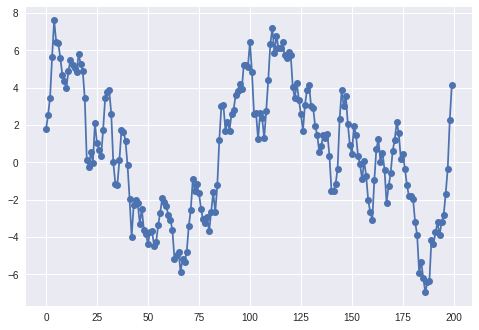

In [157]:
from statsmodels.tsa.arima_process import ArmaProcess
np.random.seed(0)
p = ArmaProcess([1, -1.2, 0.3], [1])
y = p.generate_sample(200)
plt.plot(y, 'o-')
plt.show()

In [159]:
from statsmodels.tsa.stattools import pacf
pacf = pacf(y)
pacf

array([ 1.        ,  0.954434  , -0.2736326 , -0.00179577,  0.05732259,
        0.17734768, -0.04928944,  0.05504672, -0.13653964,  0.01623869,
        0.03826421, -0.05072837,  0.12656022, -0.09010451, -0.00482013,
       -0.14227634,  0.09523362,  0.05618313,  0.03467563, -0.20119255,
       -0.07870102,  0.11652601,  0.04784023,  0.13198976, -0.10725904,
       -0.09147749, -0.1107981 , -0.02998764, -0.19292734, -0.19328953,
       -0.00497484,  0.00569143,  0.04810996,  0.06388207, -0.21928295,
       -0.16083584, -0.04436043, -0.09845151,  0.05537217, -0.10485931,
        0.08507789])

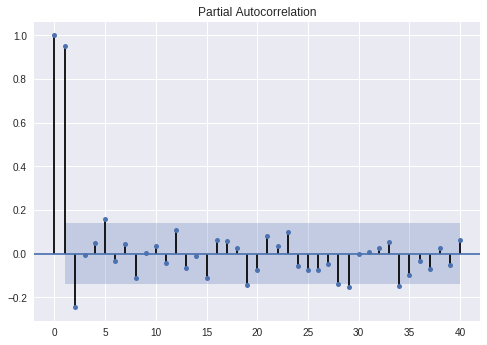

In [162]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(y, lags=40)
plt.show()

PACF 값을 ACF와 비교하면 차이점을 쉽게 볼 수 있다.

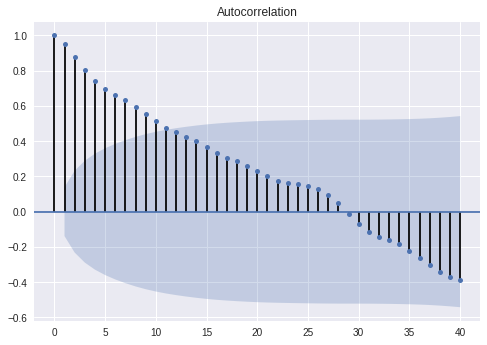

In [163]:
plot_acf(y, lags=40)
plt.show()

---

In [164]:
import scipy as sp

In [177]:
r = sp.stats.norm(0.1, 0.10).rvs(50)
df = pd.DataFrame({"r": r})
df['l+r'] = 1 + r

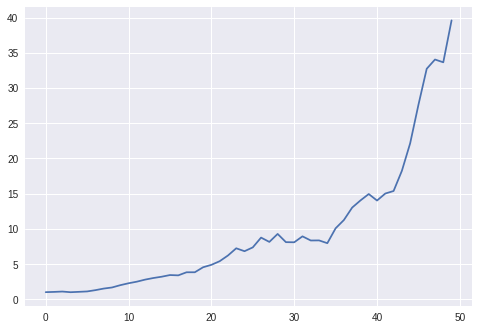

In [178]:
df['cum_prod'] = df['l+r'].cumprod()
plt.plot(df.cum_prod)

# ARIMA 모형 차수 결정의 예

다음과 같은 방법을 사용하면 ARIMA 모형의 차수를 결정하기 위한 정보를 얻을 수 있다.

* Augmented Dickey-Fuller 검정
* 자기상관계수 함수
* 편자기상관계수 함수

이러한 방법을 실제 시계열 자료에 적용하여 ARIMA 모형의 차수를 알아보자.

## 강우량 시계열

다음 자료는 미국 강수량 자료이다

In [179]:
data = sm.datasets.get_rdataset("precip")
df = data.data
df.tail()

,x
65,17.4
66,40.8
67,29.1
68,14.6
69,59.2


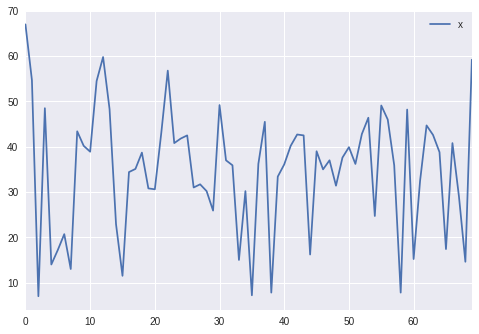

In [180]:
df.plot()
plt.show()

시계열의 ACF와 PACF를 그리면 아래와 같다. $k=0$을 제외하고는 유의미한 자기상관계수 혹은 편자기상관계수의 시차를 찾을 수 없다. 따라서 이 시계열은 가우시안 백색 잡음으로 볼 수 있다.

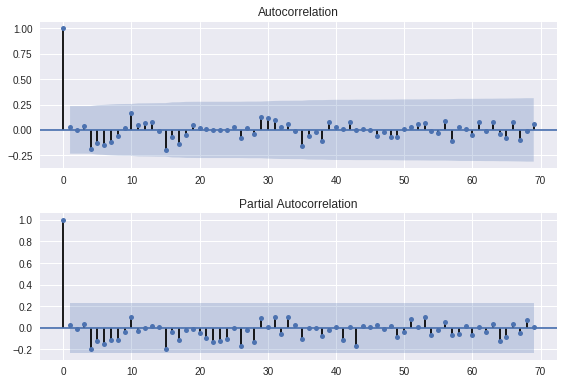

In [184]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
ax1 = plt.subplot(211); plot_acf(df.x, ax=ax1);
ax2 = plt.subplot(212); plot_pacf(df.x, ax=ax2);
plt.tight_layout()
plt.show()

## 호흡기질환 사망자수

다음 시계열 자료는 호흡기질환 사망자수에 대한 연구 자료이다.

In [185]:
data = sm.datasets.get_rdataset("deaths", "MASS")
df = data.data
df.tail()

,time,deaths
67,1979.583333,1354
68,1979.666667,1333
69,1979.750000,1492
70,1979.833333,1781
71,1979.916667,1915


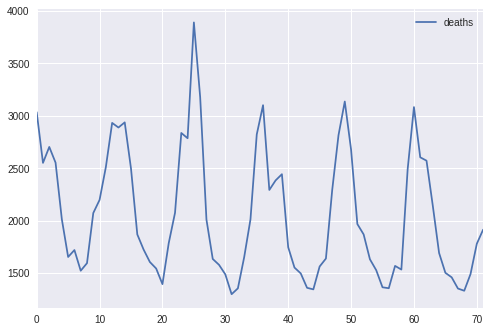

In [186]:
df.plot(y="deaths")
plt.show()

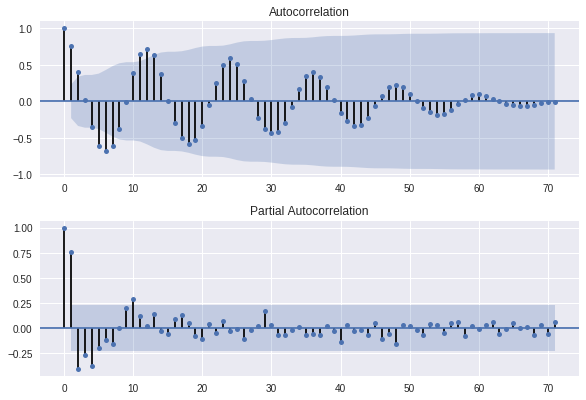

In [187]:
ax1 = plt.subplot(211); plot_acf(df.deaths, ax=ax1)
ax2 = plt.subplot(212); plot_pacf(df.deaths, ax=ax2)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

ACF가 지수함수적으로 감소하는 주기적 파형을 보이고 PACF가 2차항까지 유의한 값을 가지므로 AR(2) 모형으로 볼 수 있다.

## 항공운송량

다음 시계열 자료는 항공운송량을 나타낸 것이다.

In [188]:
data = sm.datasets.get_rdataset("AirPassengers")

In [189]:
df = data.data
df.tail()

,time,AirPassengers
139,1960.583333,606
140,1960.666667,508
141,1960.750000,461
142,1960.833333,390
143,1960.916667,432


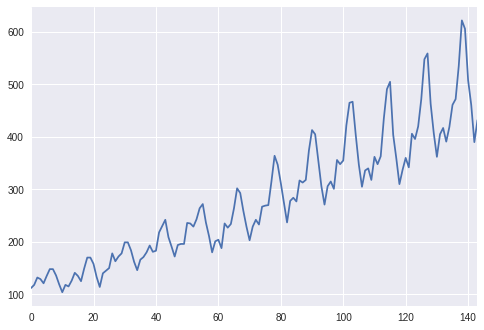

In [190]:
df["AirPassengers"].plot()
plt.show()

In [191]:
df["logAP"] = np.log(df.AirPassengers)

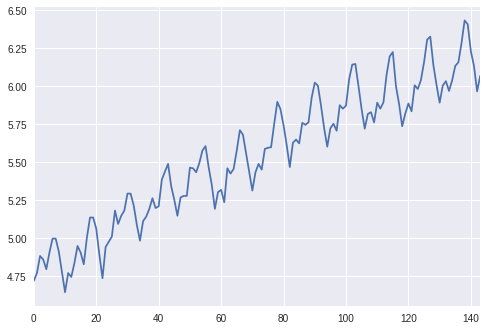

In [192]:
df["logAP"].plot()
plt.show()

다음과 같이 ADF 검정을 통해 차분 변환이 필요함을 증명할 수도 있다. 

In [194]:
from statsmodels.tsa.stattools import adfuller
adfuller(df.logAP)

(-1.7170170891069618,
 0.42236677477039075,
 13,
 130,
 {'1%': -3.4816817173418295,
  '10%': -2.5787700591715979,
  '5%': -2.8840418343195267},
 -445.39903124972091)

In [195]:
df["logAPdiff"] = df.logAP.diff()
df = df.iloc[1:, :]
df.tail()

,time,AirPassengers,logAP,logAPdiff
139,1960.583333,606,6.406880,-0.026060
140,1960.666667,508,6.230481,-0.176399
141,1960.750000,461,6.133398,-0.097083
142,1960.833333,390,5.966147,-0.167251
143,1960.916667,432,6.068426,0.102279


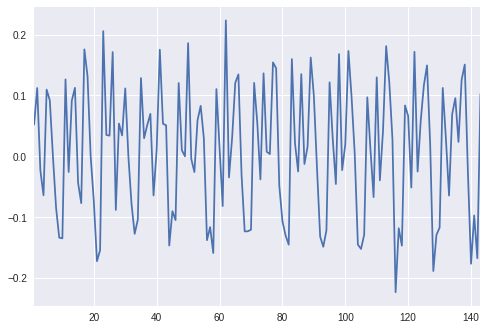

In [196]:
df["logAPdiff"].plot()
plt.show()

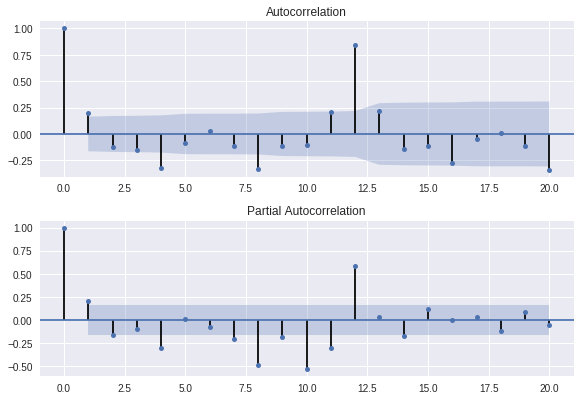

In [197]:
ax1 = plt.subplot(211); plot_acf(df["logAPdiff"], lags=20, ax=ax1)
ax2 = plt.subplot(212); plot_pacf(df["logAPdiff"], lags=20, ax=ax2)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

시차 12를 두고 강한 상관관계를 보인다. 이러한 시계열은 Seasonal 모형을 사용해야 한다.

# StatsModels 패키지의 ARMA 모형 클래스

StatsModels 패키지는 ARMA 모형 분석 및 추정을 위해 다음과 같은 클래스를 제공한다.

| 클래스 이름   | 용도        |
| ------------- |-------------|
| `ArmaProcess` | 미리 정해진 계수를 가진 ARMA 모형 |
| `ARMA`        | 주어진 자료에서 계수를 추정하기 위한 ARMA 모형 |
| `ARMAResults` | 주어진 자료에서 추정된 ARMA 모형  |

## `ArmaProcess` 클래스 사용법

`ArmaProcess` 클래스는 정해진 모형 계수를 가진 ARMA 모형을 특성을 분석하기 위한 클래스이다.

### 모형 생성

| 클래스 이름   | 용도 |
| ------------- |------|
| `ArmaProcess` | AR, MA 계수 행렬에서 ARMA 모형 생성 |
| `ArmaProcess.from_estimation()` | 추정된 ARMAResults 에서 ARMA 모형 생성 |

계수로부터 ARMA 모형을 만드는 경우에는 `ArmaProcess`를 직접 사용한다. 단, 계수의 부호는 다음 수식을 기준으로 한다. AR 계수의 부호가 일반적인 ARMA 모형과 다를 수 있다.


$$  \phi(L) Y_t = \mu + \psi(L) \varepsilon_t  $$
  

$$
\begin{eqnarray}
  \phi(L) &= 1 + a_1 L + a_2 L^2 + \cdots a_p L^p \\
  \psi(L) &= 1 + b_1 L + b_2 L^2 + \cdots b_q L^q
\end{eqnarray}
$$


$$  Y_t = -a_1 Y_{t-1} - a_2 Y_{t-2} \cdots - a_p Y_{t-p} + \mu + \varepsilon_t + b_1 \varepsilon_{t-1} + b_2 \varepsilon_{t-2} + \cdots b_q \varepsilon_{t-q} $$


다음은 `ArmaProcess` 를 사용하는 예제이다. 여기에서는 다음과 같은 ARMA(2,2) 모형을 생성한다.

$$   Y_t = 0.75 Y_{t-1} - 0.25 Y_{t-2} + \varepsilon_t + 0.65 \varepsilon_{t-1} + 0.35 \varepsilon_{t-2}  $$


In [199]:
arparams = np.array([.75, -.25])
maparams = np.array([.65, .35])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams]  # add zero-lag
m = ArmaProcess(ar, ma)
print(type(m))

<class 'statsmodels.tsa.arima_process.ArmaProcess'>


### 샘플 시계열 생성

| 메서드, 속성 이름 | 용도 |
|--|--|
| `generate_sample()` | 주어진 ARMA 모형에서 나올 수 있는 시계열을 무작위로 생성 |

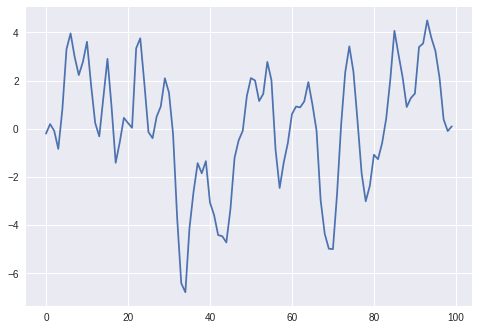

In [200]:
np.random.seed(12345)
x = m.generate_sample(100)
plt.plot(x)
plt.show()

### 특성 분석

| 메서드, 속성 이름 | 	용도 |
|--|--|
| `isstationary` |  	모형 안정성(stability) |
| `isinvertible` | 	모형 가역성(invertibility) |
| `acovf()` | 	이론적인 자기 공분산(autocovariance) 값 |
| `acf()` | 	이론적인 자기 상관계수(autocorrelation) 값 |
| `pacf()` | 	이론적인 자기 편상관계수(partial autocorrelation) 값 |

True
True


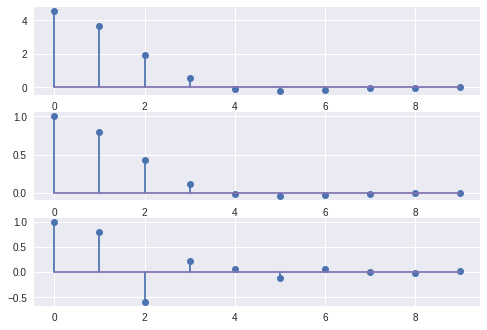

In [201]:
print(m.isstationary)
print(m.isinvertible)
plt.subplot(311)
plt.stem(m.acovf(10))
plt.subplot(312)
plt.stem(m.acf(10))
plt.subplot(313)
plt.stem(m.pacf(10))
plt.show()

## `ARMA` 및 `ARMAResults` 클래스 사용법

`ARMA` 및 `ARMAResults` 클래스는 미리 계수가 정해진 이론적 모형이 아니라 주어진 자료로부터 모형을 추정할 때 사용하는 클래스이다. 사용 방법은 다음과 같다.


1. 우선 주어진 자료와 차수를 입력변수로 `ARMA` 객체를 생성하고
2. `ARMA.fit()` 메서드를 사용하여 추정결과를 `ARMAResults` 클래스 객체로 출력한다.


In [203]:
m2 = ARMA(x, (2, 2))
print(type(m2))
r = m2.fit(disp=False)
print(type(r))
print(r.summary())

<class 'statsmodels.tsa.arima_model.ARMA'>
<class 'statsmodels.tsa.arima_model.ARMAResultsWrapper'>
                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  100
Model:                     ARMA(2, 2)   Log Likelihood                -144.231
Method:                       css-mle   S.D. of innovations              1.011
Date:                Thu, 06 Jul 2017   AIC                            300.462
Time:                        16:48:37   BIC                            316.093
Sample:                             0   HQIC                           306.788
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1152      0.533      0.216      0.829      -0.929       1.159
ar.L1.y        0.6593      0.17

`ARMA` 클래스 객체는 모델과 자료에 관한 정보를 다음과 같은 속성값에 나누어 저장한다.

| 속성 이름 | 	용도 | 
|--|--|
|`endog` |  	원자료 |
|`endog_names` |  	원자료 변수명 |

`ARMAResults` 클래스 객체는 추정 결과 정보를 다음과 같은 속성값에 나누어 저장한다.

|속성/메서드 이름 |	용도 |
|-|-|
|`model`|  	추정 자료와 모형 차수 등을 가진 ARMA 클래스 객체 |
|`k_ar`|  	AR 차수 |
|`k_ma`|  	MA 차수 |
|`arparams`|  	추정된 AR 계수 |
|`maparams`|  	추정된 MA 계수 |
|`params`|  	추정된 전체 계수 (trend 계수 포함) |
|`bse`|  	추정된 전체 계수의 표준 오차 |
|`tvalues`|  	추정된 계수의 t statistics | 
|`pvalues`|  	추정된 계수의 t statistics에 대한 p value |
|`conf_int()`|  	추정된 계수의 신뢰구간 계산 |
|`llf`|  	Log Likelihood 값 |
|`aic`|  	AIC 값 |
|`bic`|  	BIC 값 |
|`hqic`|  	HQIC 값 |
|`fittedvalues`|  	추정 모형에 의한 예측값 |
|`resid`|  	추정 모형에 의한 잔차항(Residuals) |
|`sigma2`|  	추정 모형에 의한 잔차항의 분산 |

In [204]:
r.arparams

array([ 0.65927045, -0.09655689])

In [205]:
r.maparams

array([ 0.84051327,  0.50663555])

In [206]:
r.params

array([ 0.11519302,  0.65927045, -0.09655689,  0.84051327,  0.50663555])

In [207]:
r.bse

array([ 0.53261666,  0.17061559,  0.15928805,  0.14462623,  0.10919882])

In [208]:
r.tvalues

array([ 0.21627753,  3.8640692 , -0.60617789,  5.81162394,  4.63957003])

In [209]:
r.pvalues

array([  8.29235150e-01,   2.03787004e-04,   5.45842362e-01,
         8.23426744e-08,   1.11581348e-05])

In [210]:
r.conf_int()

array([[-0.92871645,  1.15910249],
       [ 0.32487004,  0.99367086],
       [-0.40875573,  0.21564194],
       [ 0.55705107,  1.12397548],
       [ 0.29260981,  0.7206613 ]])

In [211]:
r.llf

-144.23101337028436

In [212]:
r.aic

300.4620267405687

In [213]:
r.bic

316.09304785649726

In [216]:
r.hqic

306.7881822502635

In [217]:
r.sigma2

1.0211629250255609

In [218]:
r.fittedvalues

array([ 0.11519302, -0.1550702 ,  0.40740459, -0.32549477, -1.1272896 ,
        2.01300433,  4.15862964,  2.80999896,  1.66196734,  1.78482034,
        2.77478584,  3.3608373 ,  0.01130109, -0.56145993,  0.13649946,
        2.03773318,  3.15051018, -1.09364654, -2.37881978,  1.18675761,
        0.70544452, -0.60327541,  0.35389406,  5.081992  ,  2.59672288,
       -0.35486087, -0.40722669, -0.07335289,  0.91412453,  0.91161424,
        2.34109661,  0.72959897, -1.46840029, -4.72965895, -6.36754366,
       -5.00642185, -1.50003766, -1.76064031, -0.92362559, -1.64024794,
       -0.87929311, -3.52416084, -3.16252228, -3.59388929, -3.82548857,
       -3.81937186, -1.72632007,  0.25874557, -0.51260486,  0.02249658,
        2.29116787,  1.82323764,  1.22221374,  0.64354583,  1.52794686,
        3.19042346,  0.75097732, -2.66935657, -2.12888123,  0.08842878,
       -0.40768752,  1.00974207,  1.03555465,  0.37254602,  1.27416898,
        2.15642874, -0.11340562, -0.65532912, -3.8188113 , -4.16

In [219]:
r.resid

array([-0.31990068,  0.34742281, -0.49173644, -0.51157758,  1.94332063,
        1.28494462, -0.20253081,  0.16241624,  0.56299467,  0.98570793,
        0.8333997 , -1.55262609,  0.22777513,  0.24269434,  1.16261457,
        0.86223853, -2.25224725, -0.32030571,  1.82054447, -0.73582421,
       -0.46832855,  0.6410327 ,  2.98521959, -1.32956532, -0.72093609,
        0.21517918,  0.01483056,  0.57788955,  0.00968386,  1.18284909,
       -0.84093974, -0.95272084, -2.23420219, -1.68382754, -0.41675358,
        0.87095725, -1.10859162,  0.33105506, -0.92510792,  0.29463324,
       -2.18300893, -0.05281825, -1.25213155, -0.86572935, -0.89326898,
        0.49223087,  0.51730458, -0.7416964 ,  0.42619946,  1.33465467,
       -0.18854397,  0.1789462 , -0.07329842,  0.80103219,  1.24442842,
       -1.17718752, -1.61625251,  0.21061506,  0.73173978, -0.68142317,
        1.01089347, -0.08962738, -0.15087847,  0.76014295,  0.66028715,
       -1.15562501,  0.03412407, -2.30839161, -0.54260239, -0.81

또한 `ARMAResults` 클래스 객체는 다음과 같은 유용한 메서드도 제공한다.

| 메서드 이름 	| 용도 |
|--|--|
|`summary()`| 	추정 결과 요약 문자열 |
|`summary2()`| 	추정 결과 요약 문자열 |
|`forecast()`| 	예측 (자료가 끝난 다음의 미래 예측, 신뢰구간 출력) |
|`predict()`| 	예측 (자료 내부의 in-sample 예측도 가능) |
|`plot_predict()`| 	예측 플롯. forecast() 결과를 시각화 |

In [220]:
r.forecast(20)[0]

array([ 0.56132702,  0.48980518,  0.31908644,  0.21344254,  0.16027871,
        0.13543001,  0.12418134,  0.11916473,  0.11694357,  0.11596361,
        0.11553202,  0.1153421 ,  0.11525857,  0.11522184,  0.11520569,
        0.11519859,  0.11519547,  0.11519409,  0.11519349,  0.11519323])

In [222]:
r.predict(100,120)

array([ 0.56132702,  0.48980518,  0.31908644,  0.21344254,  0.16027871,
        0.13543001,  0.12418134,  0.11916473,  0.11694357,  0.11596361,
        0.11553202,  0.1153421 ,  0.11525857,  0.11522184,  0.11520569,
        0.11519859,  0.11519547,  0.11519409,  0.11519349,  0.11519323,
        0.11519311])

/home/jihoon_kim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jihoon_kim/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/jihoon_kim/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")
/home/jihoon_kim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time defau

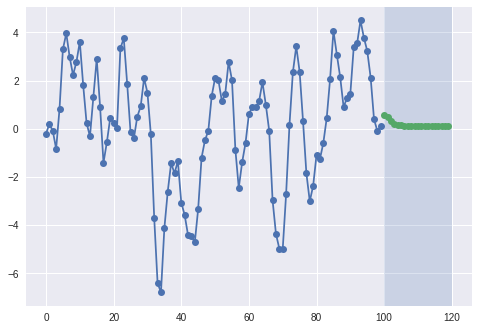

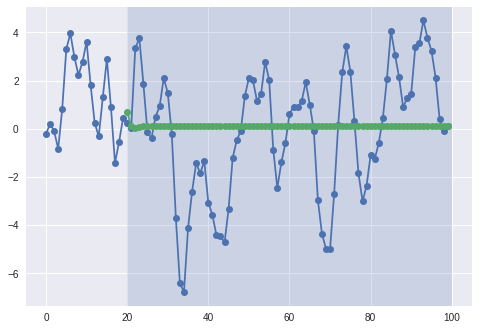

In [223]:
plt.figure(1)
plt.plot(r.model.endog, marker='o')
plt.hold(True)
plt.plot(np.r_[[np.nan] * 100, r.forecast(20)[0]], marker='o'); plt.axvspan(xmin=100, xmax=120, alpha=0.2)
plt.figure(2)
plt.plot(r.model.endog, marker='o')
plt.hold(True)
plt.plot(np.r_[[np.nan] * 20, r.predict(20, dynamic=True)], marker='o'); plt.axvspan(xmin=20, xmax=100, alpha=0.2)
plt.show()

# ARMA 모형 모수 추정

다음과 같은 ARMA(p,q) 모형과 샘플 시계열 자료가 있는 경우 최대 우도 추정법(MLE: Maximum Likelihood Estimation)을 사용하여 모형 파라미터 $\phi_i$, $\theta_i$를 구할 수 있다.

$$ Y_t = \phi_1 Y_{t-1} + \phi_2 Y_{t-2} + \cdots + \phi_p Y_{t-p} + e_t - \theta_1 e_{t-1}  - \theta_2 e_{t-2} - \cdots  - \theta_q e_{t-q} $$

MLE를 사용하기 위한 우도 함수는 다음과 같다.

$$ 
\begin{eqnarray}
\mathcal{L}(\theta; \{y_j\}) 
&=& \mathcal{L}(\phi_1, \cdots, \phi_p, \theta_1, \cdots, \theta_q; y_1, y_2, \cdots, y_N) \\
&=& f_{Y_1,\cdots , Y_N}(y_1, y_2, \cdots, y_N;\phi_1, \cdots, \phi_p, \theta_1, \cdots, \theta_q) \\
\end{eqnarray}
$$

## 확률 과정 모형의 우도 함수

확률 변수와 달리 확률 과정 모형에서는 $y_1, y_2, \cdots, y_N$이라는 샘플 각각의 값이 서로 독립(independent)이 아니므로 주어진 ARMA(p,q) 모형을 사용하여 이 값들이 동시에 나올 결합 확률 밀도 함수를 구해야 한다. 

우선 다음과 같은 초기값 가정을 하자

$$ e_p = e_{p-1} = \cdots = e_{p-q} = 0 $$ 

그런 $e_{p+1}, \cdots, e_N$은 다음 공식에서 구할 수 있다.

$$ e_{p+1}=Y_{p+1}-\phi_1Y_{p}-\phi_2 Y_{p-1} - \cdots - \phi_p Y_{1} $$

$$ e_{p+2}=Y_{p+2}-\phi_1Y_{p+1}-\phi_2Y_{p}-\cdots-\phi_pY_{2}+\theta_1e_{p+1}$$



$e$의 값이 $Y$(샘플)와 $\theta$(주어진 변수값)에서 회귀적으로 결정이 되어버렸기 때문에 $Y_t$는 $Y_{t-1}, \cdots, Y_{t-p}, e_{t-1}, \cdots, e_{t-q}$ 에 의존하는 정규 분포 확률 변수가 된다.


$$
\begin{eqnarray}
Y_{t} 
&\sim& N(y_t; \phi_1 y_{t-1} + \phi_2 y_{t-2} + \cdots + \phi_p y_{t-p}- \theta_1 e_{t-1}  - \theta_2 e_{t-2} - \cdots  - \theta_q e_{t-q} , \sigma^2) \\
&=& N(y_t;e_t(\phi_1, \cdots, \phi_p, \theta_1, \cdots, \theta_q), \sigma^2) \\
\end{eqnarray}
$$

이 식에서 모수 $\phi_1, \cdots, \phi_p, \theta_1, \cdots, \theta_q$ 들을 백색 잡음 추정값을 통해 간접적으로 영향을 미친다.

전체 우도 함수는 다음과 같아진다.

$$ \mathcal{L}(\phi_1, \cdots, \phi_p, \theta_1, \cdots, \theta_q, \sigma^2; y_1, \cdots, y_N) = \prod_{t=p+1}^N N(y_t;e_t(\phi_1, \cdots, \phi_p, \theta_1, \cdots, \theta_q), \sigma^2) $$

이 값을 최대화하는 모수 $\phi_1, \cdots, \phi_p, \theta_1, \cdots, \theta_q, \sigma^2$은 수치적 최적화 방법을 통해 계산한다.

## 파이썬을 사용한 ARMA 모수 추정

statsmodels 패키지는 ARMA 모수 추정을 위한 `ARMA`라는 클래스와 이 클래스의 `fit` 메서드를 제공한다. `ARMA` 클래스의 인수로 시계열 샘플과 차수를 넣어 인스턴스를 생성한 뒤 `fit` 메서드를 호출하면 추정 결과값을 가진 `ARMAResults` 타입의 자료를 반환한다.

`ARMAResults`의 세부적인 속성에 대해서는 관련 노트북을 참조한다.

[[school_notebook:ac028b39585e4d0bac57d5e2f5cd5ccd]]

`ARMA` 클래스와 몇가지 이론적 모형에서 시뮬레이션하여 나온 시계열 자료를 사용하여 모수를 측정하여 보자.

### MA(1) 모수 추정의 예

$$ Y_t = e_t + 0.9 e_{t-1} $$

In [226]:
np.random.seed(0)
p = ArmaProcess([1], [1, 0.9])
y = p.generate_sample(1000)
m = ARMA(y, (0, 1))
r = m.fit()
print(r.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(0, 1)   Log Likelihood               -1405.255
Method:                       css-mle   S.D. of innovations              0.986
Date:                Thu, 06 Jul 2017   AIC                           2816.509
Time:                        16:51:21   BIC                           2831.233
Sample:                             0   HQIC                          2822.105
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0853      0.060     -1.429      0.153      -0.202       0.032
ma.L1.y        0.9174      0.013     70.513      0.000       0.892       0.943
                                    Roots           

### AR(1) 모수 추정의 예

$$ Y_t = 0.9 Y_{t-1} + e_t  $$

In [228]:
np.random.seed(0)
p = ArmaProcess([1, -0.9], [1])
y = p.generate_sample(1000)
m = ARMA(y, (1, 0))
r = m.fit()
print(r.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(1, 0)   Log Likelihood               -1404.871
Method:                       css-mle   S.D. of innovations              0.985
Date:                Thu, 06 Jul 2017   AIC                           2815.742
Time:                        16:51:49   BIC                           2830.465
Sample:                             0   HQIC                          2821.337
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4251      0.360     -1.181      0.238      -1.131       0.281
ar.L1.y        0.9144      0.013     72.007      0.000       0.890       0.939
                                    Roots           

### AR(2) 모수 추정의 예

$$ Y_t = 1.5 Y_{t-1} - 0.75 Y_{t-2} + e_t  $$

In [229]:
np.random.seed(0)
p = ArmaProcess([1, -1.5, 0.75], [1])
y = p.generate_sample(1000)
m = ARMA(y, (2, 0))
r = m.fit()
print(r.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(2, 0)   Log Likelihood               -1406.159
Method:                       css-mle   S.D. of innovations              0.986
Date:                Thu, 06 Jul 2017   AIC                           2820.319
Time:                        16:52:03   BIC                           2839.950
Sample:                             0   HQIC                          2827.780
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1847      0.124     -1.484      0.138      -0.429       0.059
ar.L1.y        1.4866      0.021     69.795      0.000       1.445       1.528
ar.L2.y       -0.7371      0.021    -34.614      0.0

### ARMA(1,1) 모수 추정의 예

$$ Y_t = 0.6 Y_{t-1} + e_t + 0.3 e_{t-1}  $$

In [230]:
np.random.seed(0)
p = ArmaProcess([1, -0.6], [1, 0.3])
y = p.generate_sample(1000)
m = ARMA(y, (1, 1))
r = m.fit()
print(r.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(1, 1)   Log Likelihood               -1405.147
Method:                       css-mle   S.D. of innovations              0.986
Date:                Thu, 06 Jul 2017   AIC                           2818.295
Time:                        16:52:22   BIC                           2837.926
Sample:                             0   HQIC                          2825.756
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1436      0.103     -1.400      0.162      -0.345       0.057
ar.L1.y        0.6175      0.034     18.294      0.000       0.551       0.684
ma.L1.y        0.2606      0.043      6.090      0.0

실제 데이터에 적용된 자료는 https://datascienceschool.net/view-notebook/1a8a1c03103543168bdd43f780e7dbfe/ 에서 확인할 것.